In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns

/tmp/ipykernel_12954/1553925989.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
karst = gpd.read_file('USGS-Karst-Map/Carbonates48.shp')


In [3]:
karst = karst.to_crs('5070')
karst.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
rocktypes = karst.ROCKTYPE1.unique()

In [5]:
rocktype1_dict = {}
for rock in rocktypes:
    count = len(karst[karst.ROCKTYPE1==rock])
    #print(rock, count)
    rocktype1_dict[rock] = count
rocktype1_df = pd.Series(rocktype1_dict)
rocktype1_df.sort_values(ascending=False)

limestone                       37162
dolostone (dolomite)            12072
shale                            9486
sandstone                        7669
carbonate                        2513
beach sand                       1268
marble                           1240
sand                             1052
calcarenite                       876
fine-grained mixed clastic        868
mixed clastic/carbonate           633
arkose                            542
mudstone                          445
conglomerate                      209
quartzite                         197
siltstone                         180
clay or mud                       163
black shale                       147
chert                             124
clastic                           112
sedimentary rock                   99
silt                               85
meta-argillite                     74
argillite                          70
schist                             68
medium-grained mixed clastic       52
metasediment

In [40]:
rocktype2_dict = {}
for rock in rocktypes:
    count = len(karst[karst.ROCKTYPE2==rock])
    #print(rock, count)
    rocktype2_dict[rock] = count
rocktype2_df = pd.Series(rocktype2_dict)
rocktype2_df.sort_values(ascending=False)

limestone                       19671
shale                           10901
dolostone (dolomite)             9581
sandstone                        8682
chert                            5518
siltstone                        4245
mudstone                         2853
clay or mud                      2388
fine-grained mixed clastic       1791
carbonate                        1312
sand                              622
marble                            456
medium-grained mixed clastic      375
calc-silicate rock                343
silt                              329
conglomerate                      317
quartzite                         308
mixed clastic/carbonate           284
dolostone                         277
arenite                           238
phyllite                          162
meta-argillite                    139
melange                           107
schist                             90
clastic                            55
granulite                          49
slate       

In [4]:
p_karst_df = gpd.read_file('share/analysis-layers/processed_hucs.shp')
p_karst_df


,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,hutype,humod,tohuc,noncontrib,noncontr_1,globalid,shape_Leng,shape_Area,p_karst,geometry
0,12.0,{6505F355-D2F5-4F5B-B23D-28B9D65EDB67},None,None,None,None,2013/01/18 07:08:11.000,None,58843.60,238.13,...,S,NM,030701040805,0.0,0.000000,{96CD20DB-E29C-11E2-8094-0021280458E6},0.869532,0.022671,0.0,"POLYGON ((1218502.061 1050650.462, 1218543.097..."
1,27.0,{329AC928-B27E-451C-9894-0EA1323E83A5},{A555A768-EA50-47A8-A666-B3ACF527BB3A},None,None,None,2017/06/19 15:18:15.000,None,15342.10,62.09,...,S,NM,070900070105,0.0,0.000000,{994B6583-E29C-11E2-8094-0021280458E6},0.480628,0.006726,0.0,"POLYGON ((564066.198 2109642.315, 564204.898 2..."
2,42.0,{43CCC933-9A3E-4943-A5D4-38A2374DFF50},{C2DD1F95-EC5C-4FCF-9EB7-9B044D2B0DB4},None,None,None,2017/05/25 09:53:01.000,None,9690.86,39.22,...,C,"NC,TF",CLOSED BASIN,9693.0,39.226214,{B34096FC-E29C-11E2-8094-0021280458E6},0.395707,0.004474,0.0,"MULTIPOLYGON (((271403.020 2453930.256, 271426..."
3,58.0,{7081B289-7E36-481F-A64D-18FBDE5DB836},{C2DD1F95-EC5C-4FCF-9EB7-9B044D2B0DB4},None,None,None,2017/05/25 09:53:01.000,None,23325.34,94.39,...,S,TF,070300051007,0.0,0.000000,{B31DC3F3-E29C-11E2-8094-0021280458E6},0.731736,0.010791,0.0,"POLYGON ((285384.834 2467734.894, 285445.721 2..."
4,60.0,{37EC3111-2E10-4A97-B1C5-18EE0E4D054B},{C2DD1F95-EC5C-4FCF-9EB7-9B044D2B0DB4},None,None,None,2017/05/25 09:53:01.000,None,8666.38,35.07,...,C,TF,CLOSED BASIN,0.0,0.000000,{B31DDB27-E29C-11E2-8094-0021280458E6},0.394757,0.004016,0.0,"POLYGON ((275079.392 2471235.682, 275063.983 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29063,103569.0,{ED7FEC3A-64D8-4E88-B71D-BAC0AF2D08A7},{72602769-BB4C-4F08-B62C-812F14A258D9},None,None,None,2021/04/14 09:42:36.000,None,23135.52,93.63,...,S,TF,042600000200,0.0,0.000000,{DAB551C1-A85C-47B8-92AA-03193D8C61A4},0.815509,0.010162,0.0,"MULTIPOLYGON (((1023256.907 2172411.242, 10233..."
29064,103570.0,{689F2122-77D4-46C1-87CB-24DABA95ACA2},{72602769-BB4C-4F08-B62C-812F14A258D9},None,None,None,2021/04/14 09:42:36.000,None,12770.40,51.68,...,S,TF,042600000200,0.0,0.000000,{A77D6325-D75E-462F-AD9B-4BD81F3595F5},0.444860,0.005601,0.0,"POLYGON ((1029502.346 2163314.101, 1029715.699..."
29065,104777.0,{B87206FE-1494-42F7-B646-18BA7F4900BF},{DE1F818B-7097-4419-B088-BD73B310DE1A},None,None,None,2022/02/01 17:43:03.000,"405379,1623080",13771.45,55.73,...,F,"BC,NC,UA",041900000200,0.0,0.000000,{9C10C053-1B76-40C3-B0CD-E586D72CE974},0.762842,0.006026,0.0,"MULTIPOLYGON (((698609.713 2112293.241, 698613..."
29066,104780.0,{943FC0FF-C818-41FD-A5B6-FFE687FC836D},{CD0CC2E8-13EB-4506-BF19-8A7E44E47A1B},QL2 3DEP LiDAR,U.S. Geological Survey,None,2021/12/27 09:00:45.000,"439885,424126",6799.77,27.52,...,S,"CD,UA",071200030405,0.0,0.000000,{4B1E9421-6AFC-4B75-B97A-8BBEF4D5E874},0.290837,0.002971,0.0,"POLYGON ((701456.986 2093253.587, 701449.602 2..."


In [5]:
p_karst_df.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
from multiprocessing import Pool

def get_rock_types(huc):
    huc_geom = huc.geometry
    huc_area = huc_geom.area
    huc12 = huc.huc12
    huc_rocks = karst[karst.intersects(huc_geom)]
    this_huc_rocks_list = []
    for j, rock in huc_rocks.iterrows():
        rock_poly = rock.geometry.intersection(huc_geom)
        percent_area = rock_poly.area / huc_area        
        this_huc_rocks_list.append({'huc12':huc12, 
                                    'rocktype1':rock.ROCKTYPE1, 
                                    'rocktype2':rock.ROCKTYPE2, 
                                    'percent_area':percent_area,
                                    'induration':rock.Induration,
                                    'exposure':rock.Exposure,
                                    'unit_name':rock.UNIT_NAME,
                                    'unit_age':rock.UNIT_AGE,
                                    } )
    return this_huc_rocks_list


with Pool(10) as p:
    huc_rocks_list = p.map(get_rock_types, [row for i, row in p_karst_df.iterrows()])



In [7]:
huc_rocks_list_flat = [x for xs in huc_rocks_list for x in xs]

In [8]:
len(huc_rocks_list_flat)

149547

In [9]:
huc_rocks_df = pd.DataFrame(huc_rocks_list_flat)
huc_rocks_df = huc_rocks_df[huc_rocks_df.percent_area>0.5]
#huc_rocks_df.index = huc_rocks_df['huc12']
#huc_rocks_df = huc_rocks_df.drop('huc12', axis=1)

In [16]:
huc_rocks_df

,huc12,rocktype1,rocktype2,percent_area,induration,exposure,unit_name,unit_age
1,030701040804,dolostone (dolomite),sand,0.999925,Consolidated,E,"""Hawthorn Formation""",Miocene
3,070900070103,dolostone (dolomite),sandstone,0.999960,Consolidated,B3,Prairie du Chien Group,Ordovician
17,070300051005,shale,limestone,0.998908,Consolidated,B3,Prairie du Chien Group,Lower Ordovician
18,070400080902,dolostone (dolomite),limestone,0.539926,Consolidated,B3,"Lower Ordovician rocks, undivided",Lower Ordovician
21,070400030605,shale,limestone,0.973186,Consolidated,E,Prairie du Chien Group,Lower Ordovician
...,...,...,...,...,...,...,...,...
149524,041000010201,sandstone,dolostone (dolomite),0.551649,Consolidated,B3,Sylvania Sandstone,Lower Devonian
149528,041000010206,dolostone (dolomite),shale,1.000000,Consolidated,B3,Bass Island Dolomite,Upper Silurian
149531,040400010606,dolostone (dolomite),limestone,0.665970,Consolidated,B3,Silurian,Silurian
149543,071200030306,dolostone (dolomite),limestone,0.937839,Consolidated,B3,Silurian,Silurian


In [10]:
#p_karst_df.index = p_karst_df.huc12
p_with_rocks = p_karst_df.merge(huc_rocks_df, on='huc12', how='left')


In [11]:
p_with_rocks

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
p_karst_with_controls = gpd.read_file('processed_hucs_with_controls_4326.shp')

In [15]:
different_cols = p_with_rocks.columns.difference(p_karst_with_controls.columns)
keep_cols = different_cols.append(pd.Index(["huc12"]))

In [21]:
p_karst_df_with_controls = p_karst_with_controls.merge(
    p_with_rocks[keep_cols], on="huc12", how="inner", copy=True
)


In [19]:
p_with_rocks.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
p_karst_df_with_controls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
p_with_rocks.to_file('processed_hucs_with_rocks_5070.shp')

/tmp/ipykernel_229365/3970465630.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  p_with_rocks.to_file('processed_hucs_with_rocks_5070.shp')


In [2]:
import geopandas as gpd
p_with_rocks = gpd.read_file('processed_hucs_with_rocks_5070.shp')

In [33]:
common_rocks = rocktype1_df[rocktype1_df>5000]
common_rocks

limestone               37162
shale                    9486
dolostone (dolomite)    12072
sandstone                7669
dtype: int64

In [34]:
#p_with_rocks[p_with_rocks.p_karst ==0] = 1e-7


In [35]:
p_with_common_rocks = p_with_rocks[p_with_rocks.rocktype1.isin(common_rocks.index.values)]
p_with_rocks_no_zeros = p_with_rocks[p_with_rocks.p_karst>0]

In [3]:
limestones = p_with_rocks[p_with_rocks['rocktype1']=='limestone']
sandstones = p_with_rocks[p_with_rocks['rocktype1']=='sandstone']
dolomite = p_with_rocks[p_with_rocks['rocktype1']=='dolostone (dolomite)']
shale = p_with_rocks[p_with_rocks['rocktype1']=='shale']


In [4]:
lime_p_zero = len(limestones[limestones.p_karst == 0]) / len(limestones.p_karst)
print('Percent zero for limestone = ', str(lime_p_zero*100)[:4])
sand_p_zero = len(sandstones[sandstones.p_karst == 0]) / len(sandstones.p_karst)
print('Percent zero for sandstone = ', sand_p_zero)
shale_p_zero = len(shale[shale.p_karst == 0]) / len(shale.p_karst)
print('Percent zero for shale = ', shale_p_zero)
dolomite_p_zero = len(dolomite[dolomite.p_karst == 0]) / len(dolomite.p_karst)
print('Percent zero for dolomite = ', dolomite_p_zero)


Percent zero for limestone =  78.5
Percent zero for sandstone =  0.8862745098039215
Percent zero for shale =  0.8231474407944996
Percent zero for dolomite =  0.7613929492691316


/tmp/ipykernel_410466/1417314107.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Shale', 'Limestone', 'Dolomite', 'Sandstone'], fontsize=12)


[Text(0, 0, 'Shale'),
 Text(1, 0, 'Limestone'),
 Text(2, 0, 'Dolomite'),
 Text(3, 0, 'Sandstone')]

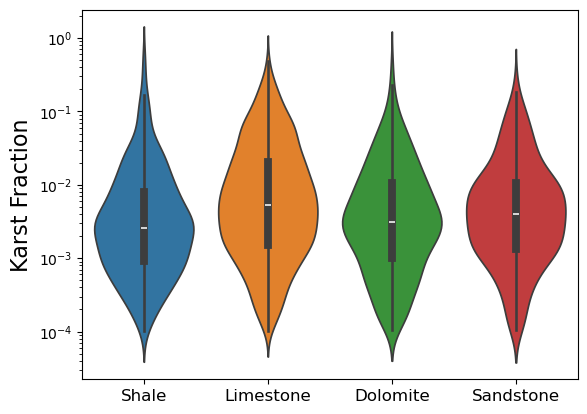

In [48]:
import matplotlib.pyplot as plt
p_with_common_rocks_no_zeros = p_with_common_rocks[p_with_common_rocks.p_karst>1e-4]
g = sns.violinplot(p_with_common_rocks_no_zeros, x='rocktype1', y='p_karst', log_scale=True, hue='rocktype1')
plt.ylabel('Karst Fraction', fontsize=16)
plt.xlabel('')
g.set_xticklabels(['Shale', 'Limestone', 'Dolomite', 'Sandstone'], fontsize=12)
#g.set_yticklabels(fontsize=14)

<Axes: >

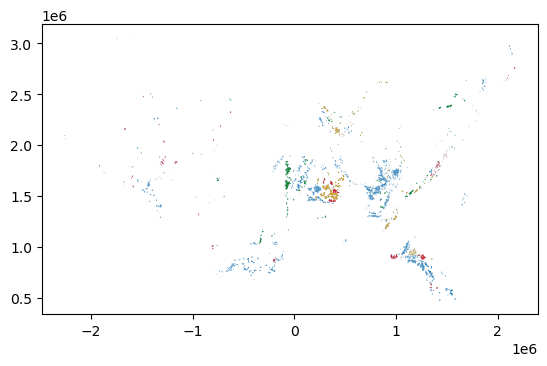

In [141]:
ax = p_with_rocks.plot()
sandstone = p_with_rocks[p_with_rocks.rocktype1=='sandstone']
sandstone.plot(color='red', ax=ax)
shale = p_with_rocks[p_with_rocks.rocktype1=='shale']
shale.plot(color='green', ax=ax)
dolomite = p_with_rocks[p_with_rocks.rocktype1=='dolostone (dolomite)']
dolomite.plot(color='orange', ax=ax)

In [139]:
p_with_rocks.rocktype2.unique()

array(['limestone', 'shale', nan, 'chert', 'mudstone',
       'dolostone (dolomite)', 'siltstone', 'sand', 'claystone',
       'sandstone', 'clay or mud', 'phyllite', 'black shale', 'carbonate',
       'medium-grained mixed clastic', 'dolostone',
       'fine-grained mixed clastic', 'arenite', 'marble', 'conglomerate',
       'calcarenite'], dtype=object)

In [207]:
high_karst = p_with_rocks[p_with_rocks.p_karst>0.05]
high_karst.unit_name.unique()

array([nan, 'Bangor Limestone', 'Ocala Limestone',
       'Hawthorn Group, Coosawhatchie Formation', 'Greenbrier Group',
       'Beekmantown or Lower Ordovician Group',
       'Moccasin or Bays Formation through Blackford Formation',
       'Tuscumbia Limestone and Fort Payne Chert undifferentiated',
       'Pennington Formation',
       'Upper Valmeyeran (Aux Vases, Ste. Genevieve, St. Louis) Series',
       'Galena-Decorah-Platteville Formations', 'Alum Bluff Group',
       'Hawthorn Group, Statenville Formation', '"Hawthorn Formation"',
       'Greenbrier Limestone', 'CHESTERIAN SERIES',
       'Hardy Creek Limestone through Dot Limestone',
       'Nolichucky and Honaker Formations', 'Suwannee Limestone',
       'Phosphoria, Wells, and Amsden Formations (TB), Phosphoria Formation and related rocks, Quadrant Sandstone, and Amsden Formation (Y), or Phosphoria Formation and related rocks, Tensleep Sandstone, and Amsden Formation (N)',
       'Hawthorn Group, Torreya Formation', 'Chicka

In [196]:
p_with_rocks[p_with_rocks.unit_name=='Graneros Shale and Greenhorn Formation']

,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,shape_Area,p_karst,geometry,rocktype1,rocktype2,percent_area,induration,exposure,unit_name,unit_age
6945,23442.0,{C552AAC9-BF1F-4541-BA2A-985DDC3CCD8C},{880A2DC4-38BC-43ED-A5E1-9A0D93B8CE63},NaN,NaN,NaN,2017/10/18 13:06:36.000,NaN,26611.21,107.69,...,0.010861,0.000000,"MULTIPOLYGON (((-624114.076 1541144.608, -6240...",shale,limestone,0.583478,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
6950,23457.0,{93B99D08-E876-4018-A170-6D7131940A62},{880A2DC4-38BC-43ED-A5E1-9A0D93B8CE63},NaN,NaN,NaN,2017/10/18 13:06:32.000,NaN,21142.10,85.56,...,0.008616,0.000000,"POLYGON ((-647038.785 1531137.205, -647045.017...",shale,limestone,0.999538,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
6955,23472.0,{5D4BB27C-F12D-4AA1-AF97-2B2C0B31741B},{880A2DC4-38BC-43ED-A5E1-9A0D93B8CE63},NaN,NaN,NaN,2017/10/18 13:06:36.000,NaN,31337.35,126.82,...,0.012786,0.000000,"MULTIPOLYGON (((-664402.886 1544446.815, -6643...",shale,limestone,0.725390,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
7126,24203.0,{2B526943-E8E5-4362-BCBB-1A72F184AE4C},{07FA5314-5E22-47B1-B4CE-04BA0E2C0846},NaN,NaN,NaN,2017/10/19 15:24:04.000,NaN,34047.26,137.78,...,0.013808,0.000000,"MULTIPOLYGON (((-683106.107 1499447.062, -6831...",shale,limestone,0.621974,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
7133,24210.0,{3458B732-7458-41D4-821D-4EDE9DA2805C},{07FA5314-5E22-47B1-B4CE-04BA0E2C0846},NaN,NaN,NaN,2017/10/19 15:24:05.000,NaN,18613.23,75.33,...,0.007573,0.000000,"POLYGON ((-654307.804 1510771.691, -654333.061...",shale,limestone,0.999688,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
8072,28669.0,{141E68D9-824C-4BE3-B0BA-1E5462B96F97},{A3FD5FEC-9B92-4BB7-A962-8E03888BDDB1},NaN,NaN,NaN,2017/10/26 15:40:15.000,NaN,19938.24,80.69,...,0.008084,0.000000,"MULTIPOLYGON (((-695011.994 1483260.878, -6950...",shale,limestone,0.724515,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
12681,44651.0,{4423A091-8765-4A17-AA47-A03783095984},NaN,NaN,NaN,NaN,2013/01/18 07:08:41.000,NaN,24203.67,97.95,...,0.009848,0.000000,"POLYGON ((-658191.936 1513920.653, -658206.364...",shale,limestone,0.999766,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
12682,44653.0,{43B1B005-038A-4483-8FA8-779D51F8E4F8},NaN,NaN,NaN,NaN,2013/01/18 07:08:41.000,NaN,38787.99,156.97,...,0.015790,0.000000,"MULTIPOLYGON (((-637184.052 1515319.133, -6374...",shale,limestone,0.708212,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
12684,44655.0,{D4F352BC-A269-4C9C-8BCA-6340BADE9DA6},NaN,NaN,NaN,NaN,2013/01/18 07:08:41.000,NaN,28415.96,115.00,...,0.011568,0.000000,"POLYGON ((-658068.694 1515246.949, -658055.831...",shale,limestone,0.946035,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous
12685,44656.0,{A6C762F2-14BA-4E79-A258-7FD421761B8E},NaN,NaN,NaN,NaN,2013/01/18 07:08:41.000,NaN,21471.40,86.89,...,0.008734,0.000000,"POLYGON ((-638728.744 1510091.228, -638741.986...",shale,limestone,0.999396,Consolidated,E,Graneros Shale and Greenhorn Formation,Cretaceous


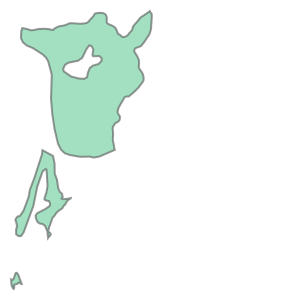

In [197]:
p_with_rocks.iloc[20482].geometry

<Axes: xlabel='areasqkm', ylabel='Count'>

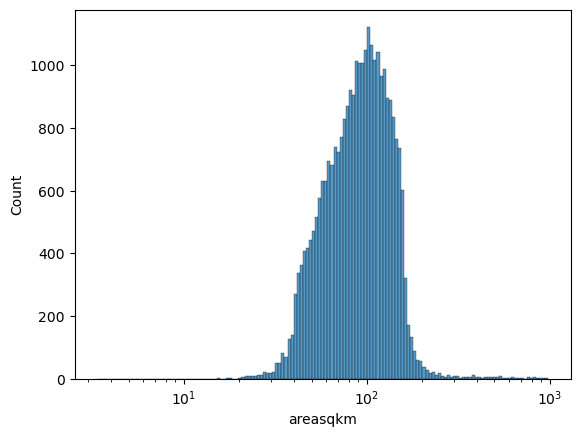

In [42]:
sns.histplot(p_with_rocks, x='areasqkm', log_scale=True)

In [208]:
high_karst_by_units = high_karst.groupby('unit_name')

In [237]:
des = high_karst_by_units.p_karst.describe()
des = des[des['count']>3]
des

,count,mean,std,min,25%,50%,75%,max
unit_name,,,,,,,,
Bangor Limestone,4.0,0.191121,0.207031,0.055365,0.057748,0.107820,0.241193,0.493480
Blue River Group,24.0,0.185744,0.128279,0.053863,0.082336,0.163511,0.232496,0.467186
Buda Limestone,5.0,0.061710,0.001852,0.058824,0.061226,0.062121,0.062631,0.063746
Greenbrier Group,7.0,0.251251,0.122581,0.079395,0.164916,0.289068,0.314492,0.431477
"Hawthorn Group, Coosawhatchie Formation",7.0,0.092768,0.038226,0.050751,0.068263,0.090646,0.101862,0.167730
"Hawthorn Group, Statenville Formation",12.0,0.097445,0.022844,0.053720,0.089203,0.095484,0.111514,0.133510
"Hawthorn Group, Torreya Formation",4.0,0.126809,0.057935,0.059122,0.098844,0.124739,0.152703,0.198634
Knox Group,16.0,0.100226,0.081837,0.050360,0.056971,0.067747,0.101513,0.365794
Moccasin or Bays Formation through Blackford Formation,7.0,0.109765,0.044437,0.055352,0.073011,0.110631,0.147500,0.161348


In [221]:
high_karst_units = des.index.values

In [222]:
high_karst = high_karst[high_karst.unit_name.isin(high_karst_units)]
high_karst

,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,shape_Area,p_karst,geometry,rocktype1,rocktype2,percent_area,induration,exposure,unit_name,unit_age
114,659.0,{FB91FFD5-90BF-498A-8799-EFD70BC6AB96},NaN,NaN,NaN,NaN,2013/01/18 07:07:57.000,NaN,16953.30,68.61,...,0.006695,0.157097,"MULTIPOLYGON (((854992.194 1257706.681, 854954...",limestone,mudstone,0.699581,Consolidated,E,Bangor Limestone,Mississippian
115,662.0,{221132E1-C88D-430D-A6F9-533BD61A7AA3},NaN,NaN,NaN,NaN,2013/01/18 07:07:57.000,NaN,32029.17,129.62,...,0.012632,0.055365,"MULTIPOLYGON (((847573.501 1248903.578, 847570...",limestone,mudstone,0.999891,Consolidated,E,Bangor Limestone,Mississippian
130,779.0,{029F94FE-455D-4B35-A421-70EB5548307C},{92EABE43-AB4C-48B4-84FA-5EC8B63EB2C5},NaN,NaN,NaN,2022/01/13 13:22:02.000,NaN,108495.86,439.07,...,0.040732,0.162404,"MULTIPOLYGON (((1332699.103 796882.175, 133273...",limestone,dolostone (dolomite),0.663610,Consolidated,E,Ocala Limestone,Eocene
133,782.0,{C5EC8F54-0C39-450E-9D29-D534AA46622C},{92EABE43-AB4C-48B4-84FA-5EC8B63EB2C5},NaN,NaN,NaN,2022/01/13 13:22:04.000,NaN,30401.08,123.03,...,0.011404,0.065918,"MULTIPOLYGON (((1353303.339 771691.688, 135335...",sand,clay or mud,0.999977,Consolidated,E,"Hawthorn Group, Coosawhatchie Formation",Miocene
134,783.0,{01D92268-C3C0-4085-92D3-6A3F228EB241},{92EABE43-AB4C-48B4-84FA-5EC8B63EB2C5},NaN,NaN,NaN,2017/07/11 11:17:56.000,NaN,84772.14,343.06,...,0.031895,0.131130,"POLYGON ((1299759.732 809545.798, 1299791.080 ...",limestone,dolostone (dolomite),0.612878,Consolidated,E,Ocala Limestone,Eocene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27401,95194.0,{D5F02AD9-0443-4D46-BE16-5FAD61C75633},{5300E50B-E253-4576-843E-1589298AF557},NaN,NaN,NaN,2013/01/18 07:08:57.000,NaN,27186.41,110.02,...,0.010952,0.107024,"MULTIPOLYGON (((1092631.122 1473167.578, 10927...",dolostone (dolomite),limestone,0.593778,Consolidated,E,Knox Group,Ordovician to Cambrian
27751,95797.0,{89DC5DB9-2D5F-4872-A67E-E9FE7058154F},NaN,NaN,NaN,NaN,2013/01/18 07:09:01.000,NaN,21465.50,86.87,...,0.008200,0.063746,"POLYGON ((-451363.416 892650.930, -451264.340 ...",limestone,NaN,0.972957,Consolidated,E,Buda Limestone,Early Cretaceous
29007,102790.0,{17FA9547-833E-4EC2-B9A5-029221972A86},{0E0DAEE0-CA9E-42B5-9FE6-BBD99DFA0654},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,NaN,2022/01/13 13:22:07.000,NaN,26833.41,108.59,...,0.010047,0.174452,"MULTIPOLYGON (((1358922.782 746279.031, 135885...",limestone,dolostone (dolomite),1.000000,Consolidated,E,Ocala Limestone,Eocene
29048,102871.0,{73D31DE0-AED2-4468-AA36-D8EBA62C1B79},NaN,NaN,NaN,NaN,2013/01/18 07:08:11.000,NaN,22382.30,90.58,...,0.008416,0.152267,"POLYGON ((1343343.918 801905.651, 1343359.847 ...",limestone,dolostone (dolomite),0.706908,Consolidated,E,Ocala Limestone,Eocene


In [18]:
import matplotlib.pyplot as plt

fig = sns.catplot(high_karst, x='unit_name', y='p_karst', kind='box', log_scale=True, height=3, aspect=3)
#ax = plt.gca()
#ax.set
fig.set_xticklabels(rotation=45)

NameError: name 'high_karst' is not defined